In [4]:
from sklearn.datasets import load_boston

import matplotlib.pyplot as plt

In [5]:
boston = load_boston()
X = boston.data
y = boston.target
print(boston.DESCR)


Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, 
                           max_features=10, 
                           min_samples_split=2,
                           random_state=10)
rf.fit(X,y)
score = cross_val_score(rf,X,y,cv = 5)
print('score: mean={:.2e} ; std={:.2e}'\
      .format(score.mean(),score.std()))
    

score: mean=6.54e-01 ; std=1.84e-01


In [29]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators' : [100,1000],
    'max_features' : [10,13],
    'min_samples_split' : [2,10]
}
clf = GridSearchCV(rf, parameters, cv=5, verbose=1,n_jobs=4)

clf.fit(X,y)
print('GridSearch finished')

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   26.8s finished


GridSearch finished


In [30]:
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))


0.654 (+/-0.369) for {'max_features': 10, 'min_samples_split': 2, 'n_estimators': 100}
0.661 (+/-0.355) for {'max_features': 10, 'min_samples_split': 2, 'n_estimators': 1000}
0.644 (+/-0.360) for {'max_features': 10, 'min_samples_split': 10, 'n_estimators': 100}
0.655 (+/-0.355) for {'max_features': 10, 'min_samples_split': 10, 'n_estimators': 1000}
0.609 (+/-0.459) for {'max_features': 13, 'min_samples_split': 2, 'n_estimators': 100}
0.624 (+/-0.428) for {'max_features': 13, 'min_samples_split': 2, 'n_estimators': 1000}
0.610 (+/-0.453) for {'max_features': 13, 'min_samples_split': 10, 'n_estimators': 100}
0.622 (+/-0.420) for {'max_features': 13, 'min_samples_split': 10, 'n_estimators': 1000}


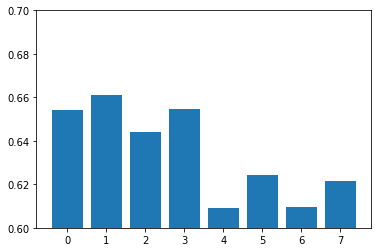

In [33]:
plt.bar(range(len(means)),means)
plt.ylim(.6,.7)
plt.show()